# Logistic regression model for fair recidivism prediction tasks.

#### COMPAS dataset

This dataset is used to assess the likelihood that a criminal defendant will re-offend.

##### Aim 1: to make a logistic regression model using this dataset 

##### and to get the predictions, ground truth values, and protected vs non protected attributes.

#### Prediction Objective: 
Estimate the target variable 'recidivism outcome', which is either 'Did recid' or 'No recid' for each set of input features.

In [1]:
#import datasets
from aif360.datasets import StandardDataset
from aif360.datasets import CompasDataset
#import fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt



pip install 'aif360[inFairness]'


##### Note: The label value 0 in this case is considered favorable (no recidivism).

In [8]:
#import datasets
from aif360.datasets import StandardDataset
from aif360.datasets import CompasDataset
#import fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd


#load COMPAS dataset

try:
    compas = CompasDataset(
        protected_attribute_names=['sex', 'race'],
        privileged_classes=[['Female'], ['Caucasian']], 
        features_to_keep=['age', 'c_charge_degree', 'race', 'age_cat', 
                          'sex', 'priors_count', 'days_b_screening_arrest', 'c_charge_desc'],
        features_to_drop=[],
        categorical_features=['age_cat', 'c_charge_degree', 'c_charge_desc'],
        label_name='two_year_recid'
    )
    print("Dataset loaded successfully!")

    #returns the dataframe and the metadata in a tuple
    df, meta = compas.convert_to_dataframe()

except Exception as e:
    print(f"Error loading COMPAS dataset: {e}")


print("compas object type:", type(compas))
#print("Dataframe for compas dataset:", df.head())
print("show columns and data types for dataframe: ", df.info)


Dataset loaded successfully!
compas object type: <class 'aif360.datasets.compas_dataset.CompasDataset'>
show columns and data types for dataframe:  <bound method DataFrame.info of        sex   age  race  priors_count  days_b_screening_arrest  \
1      0.0  69.0   0.0           0.0                     -1.0   
3      0.0  34.0   0.0           0.0                     -1.0   
4      0.0  24.0   0.0           4.0                     -1.0   
7      0.0  44.0   0.0           0.0                      0.0   
8      0.0  41.0   1.0          14.0                     -1.0   
...    ...   ...   ...           ...                      ...   
10996  0.0  23.0   0.0           0.0                     -1.0   
10997  0.0  23.0   0.0           0.0                     -1.0   
10999  0.0  57.0   0.0           0.0                     -1.0   
11000  1.0  33.0   0.0           3.0                     -1.0   
11001  1.0  23.0   0.0           2.0                     -2.0   

       age_cat=25 - 45  age_cat=Greater

#### Label names mapping and Protected attribute mappings

In [7]:
print("label names: ", compas.metadata['label_maps'])
print("Protected attributes: ", compas.metadata['protected_attribute_maps'])

label names:  [{1.0: 'Did recid.', 0.0: 'No recid.'}]
Protected attributes:  [{0.0: 'Male', 1.0: 'Female'}, {1.0: 'Caucasian', 0.0: 'Not Caucasian'}]


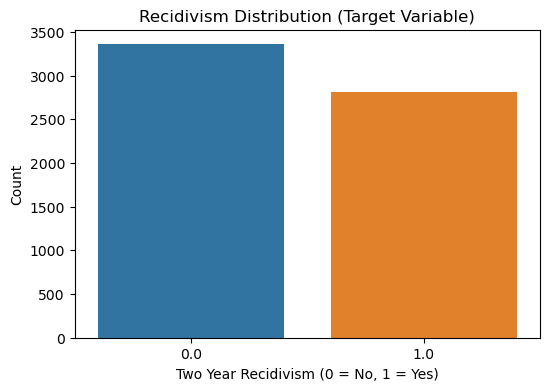

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['two_year_recid'])
plt.title("Recidivism Distribution (Target Variable)")
plt.xlabel("Two Year Recidivism (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


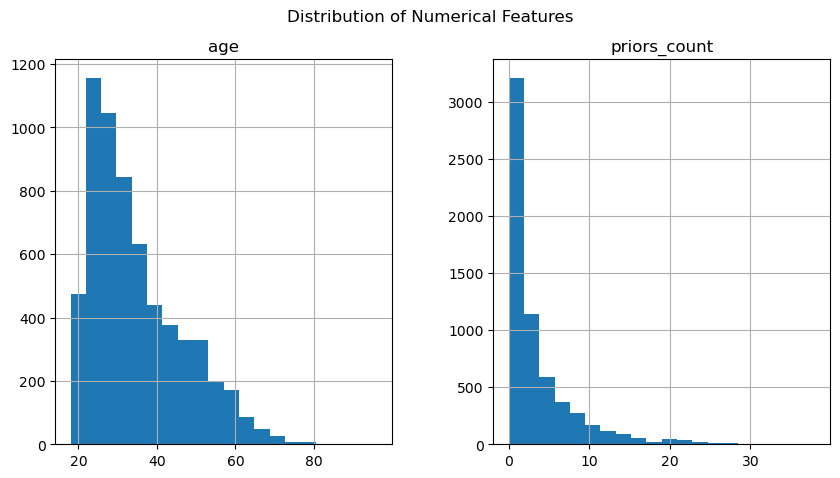

In [4]:
df[['age', 'priors_count']].hist(figsize=(10,5), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

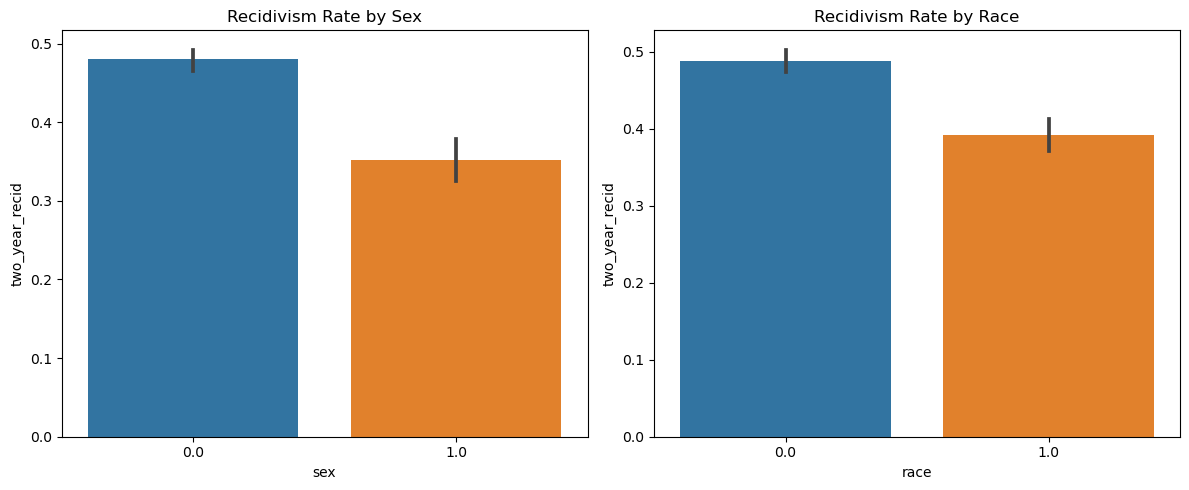

In [5]:
plt.figure(figsize=(12,5))

# Sex vs. Recidivism
plt.subplot(1,2,1)
sns.barplot(x='sex', y='two_year_recid', data=df)
plt.title("Recidivism Rate by Sex")

# Race vs. Recidivism
plt.subplot(1,2,2)
sns.barplot(x='race', y='two_year_recid', data=df)
plt.title("Recidivism Rate by Race")

plt.tight_layout()
plt.show()


## Training a logistic regression model on the COMPAS dataset